In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 500

df = pd.DataFrame({
    "ipk": np.round(np.random.uniform(2.0, 4.0, n), 2),
    "jumlah_sks": np.random.randint(110, 161, n),
    "kehadiran": np.round(np.random.uniform(50, 100, n), 1),
    "pengulangan": np.random.randint(0, 6, n)
})

df["lulus"] = ((df["ipk"] > 3.0) &
               (df["kehadiran"] > 75) &
               (df["pengulangan"] <= 1)).astype(int)

df.head()


,ipk,jumlah_sks,kehadiran,pengulangan,lulus
0,2.75,126,95.5,3,0
1,3.90,118,56.1,5,0
2,3.46,142,61.8,2,0
3,3.20,129,58.3,2,0
4,2.31,122,59.3,3,0


In [16]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df.drop(columns=["lulus"])  # semua kolom kecuali 'lulus' sebagai fitur
y = df["lulus"]  # target prediksi

# Bagi data menjadi data latih dan uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [7]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        10

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



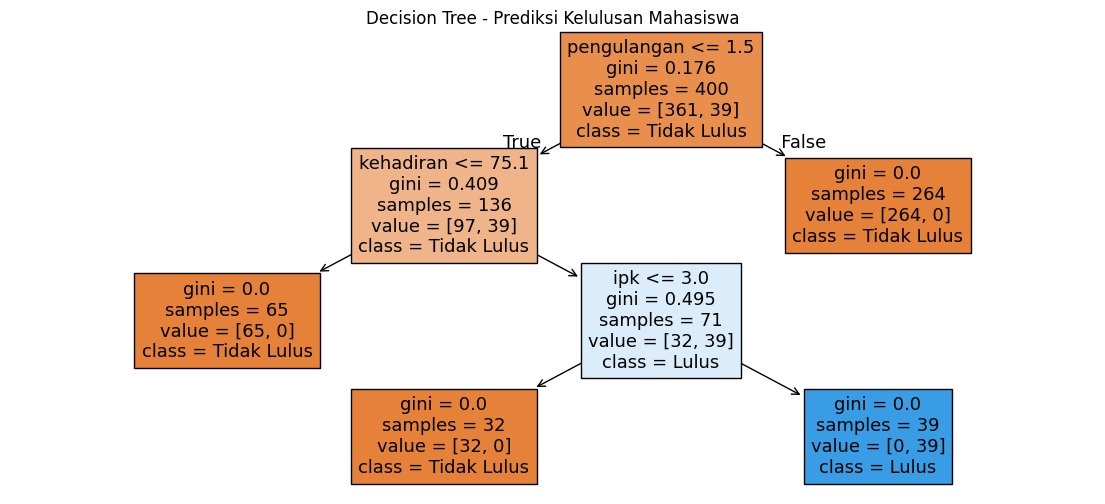

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(14, 6))
plot_tree(clf, feature_names=X.columns, class_names=["Tidak Lulus", "Lulus"], filled=True)
plt.title("Decision Tree - Prediksi Kelulusan Mahasiswa")
plt.show()
